# Assignment2 for research track 2

Name: Kohei Tateyama
Student ID: S6427214

### Imports

In [1]:
import rospy
from std_msgs.msg import String
from nav_msgs.msg import Odometry
from assignment_2_2023.msg import Position, Goal
import assignment_2_2023
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


### Liveplot

In [2]:
%matplotlib widget
class Visualiser:
    def __init__(self):
        self.fig, self.ax = plt.subplots()
        self.ln, = self.ax.plot([], [], 'ro', label='Position')
        self.x_pos, self.y_pos = [], []
        self.x_goal, self.y_goal = 0, 0
        self.plot_init()

    def plot_init(self):
        self.ax.set_xlim(-10, 10)
        self.ax.set_ylim(-10, 10)
        self.ax.legend()
        return self.ln,

    # def goal_callback(self, goal_msg):
    #     self.x_goal = goal_msg.x
    #     self.y_goal = goal_msg.y
    #     # Update goal plot
    #     self.goal_ln.set_data([self.x_goal], [self.y_goal])

    def position_callback(self, pos_msg):
        self.y_pos.append(pos_msg.y)
        self.x_pos.append(pos_msg.x)

    def update_plot(self, frame):
        self.ln.set_data(self.x_pos, self.y_pos)
        return self.ln, 



### Main function

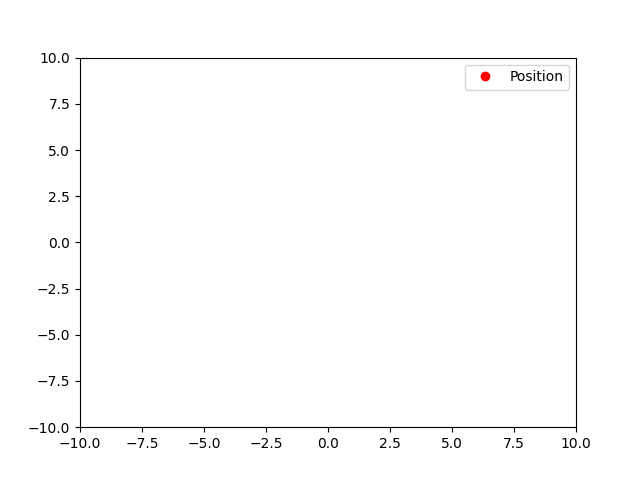

In [4]:
rospy.init_node('jupyter_node')
vis = Visualiser()
sub = rospy.Subscriber('/position', Position, vis.position_callback)
# sub2 = rospy.Subscriber('/goal_topic', Goal, vis.goal_callback)

ani = FuncAnimation(vis.fig, vis.update_plot, init_func=vis.plot_init,save_count=20)
plt.show(block=True)